# LINEAR REGRESSION MODEL
It is a type of algorithm in supervised machine learning .

They are used to work on the basis of labeled data which are used to make better prediction's.

Here we can see for a fact that labeled data's are the one's where there values are already determined .

Using linear we map the labeled datasets to its values using linear functions.





# DATA INITIALIZATION:

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd

In [2]:
df=pd.read_csv('/work/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# DATA CLEANING

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

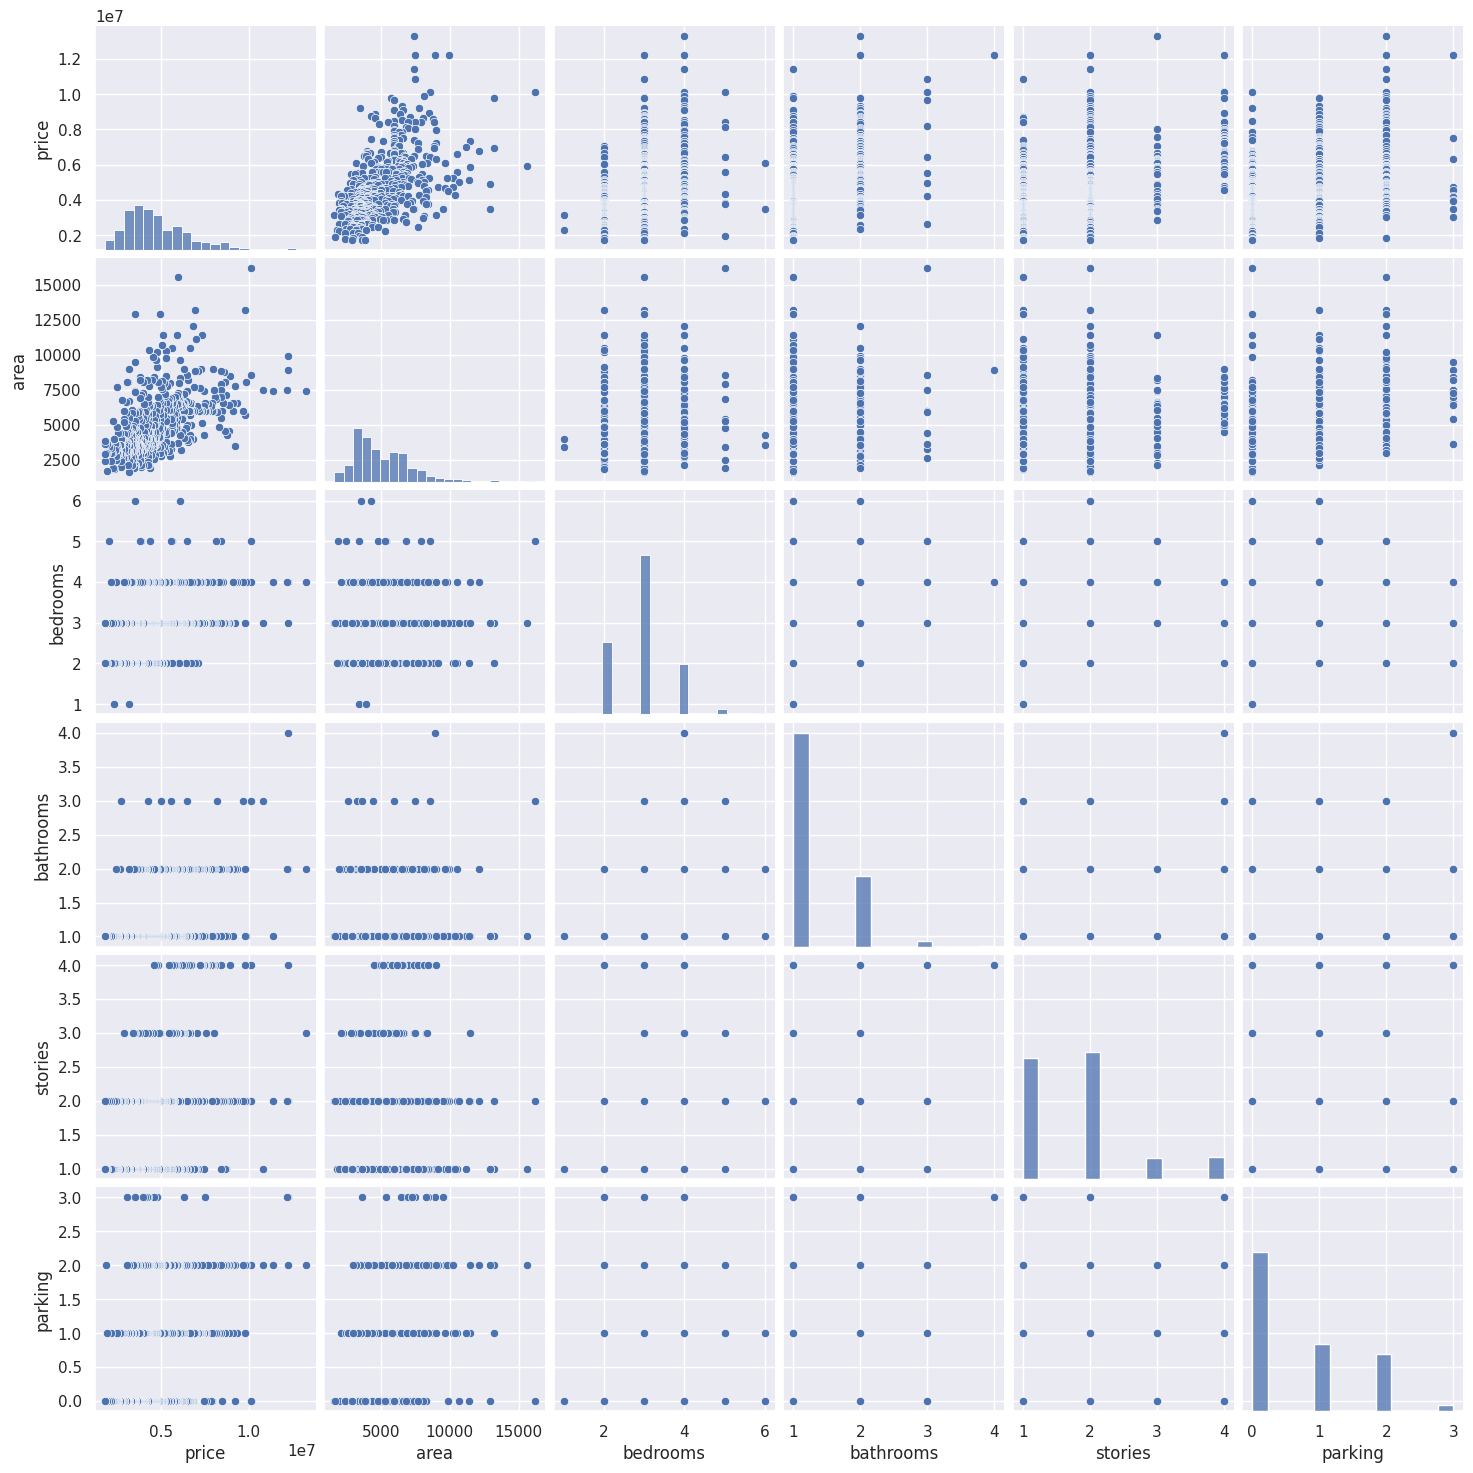

In [8]:
sns.pairplot(data=df)

/tmp/ipykernel_75/4056653238.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1=sns.distplot((df['area']),ax=axs[0,0])
/tmp/ipykernel_75/4056653238.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2=sns.distplot((df['price']),ax=axs[0,1])
/tmp/ipykernel_75/4056653238.py:5: UserWarning: 

`distplot` is a depre

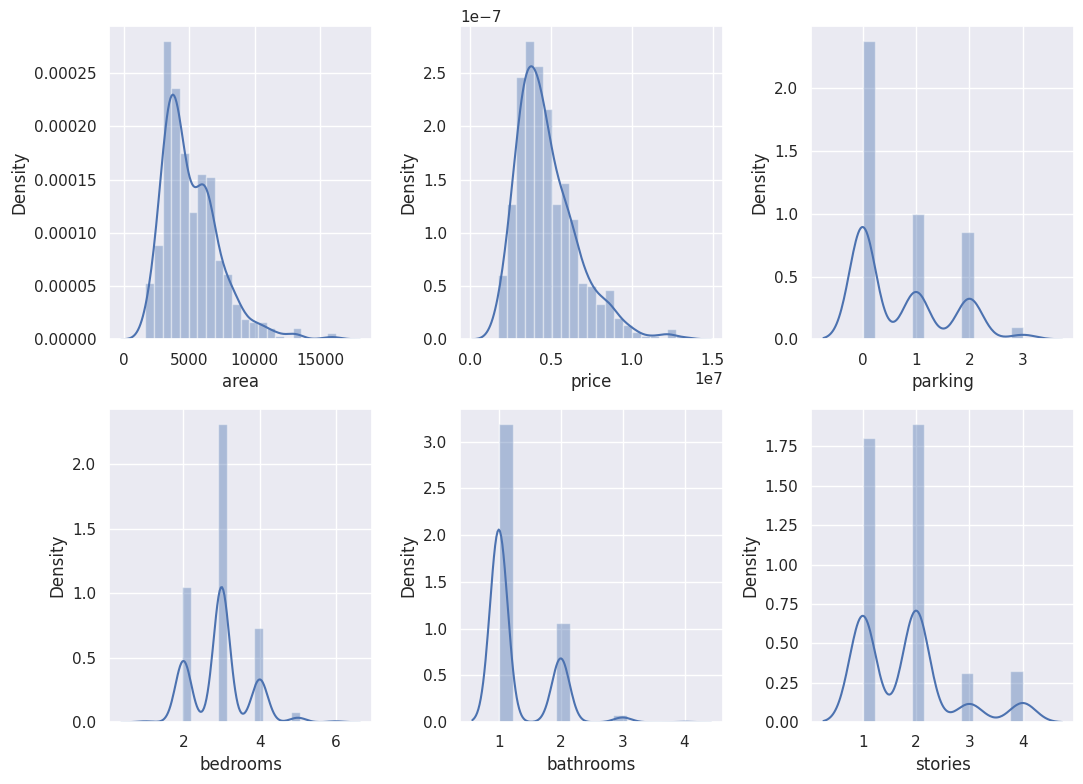

In [9]:
#checking for outliers :
fig,axs= plt.subplots(2,3, figsize=(11,8))
plt1=sns.distplot((df['area']),ax=axs[0,0])
plt2=sns.distplot((df['price']),ax=axs[0,1])
plt3=sns.distplot((df['parking']),ax=axs[0,2])
plt4=sns.distplot((df['bedrooms']),ax=axs[1,0])
plt5=sns.distplot((df['bathrooms']),ax=axs[1,1])
plt6=sns.distplot((df['stories']),ax=axs[1,2])

plt.tight_layout()

upperlimit 10378048.0946786
lowerlimit 10378048.0946786


{'whiskers': [<matplotlib.lines.Line2D at 0x7f88812719d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8881271f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8881271730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f888127f490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f888127f730>],
 'means': []}

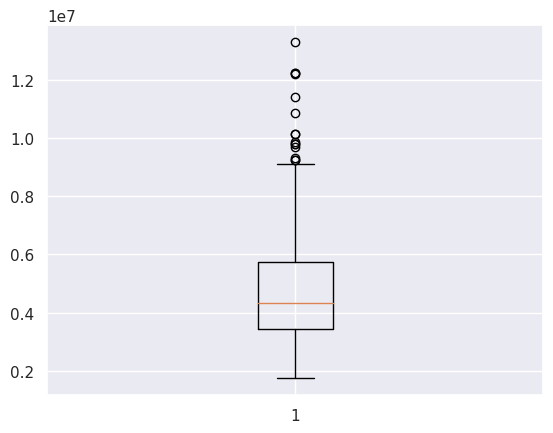

In [10]:
#price and area consist of outliers
#these outliers shall be dropped by using the zero score method
#zero score method.
upperlimit=df['price'].mean()+3*df['price'].std()
lowerlimit=df['price'].mean()+3*df['price'].std()
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)
#they consist of the same mean value
#finding outliers
df.loc[(df['price'] > upperlimit) | (df['price'] < lowerlimit)]
plt.boxplot(df.price)

upperlimit 11660.964351930079
lowerlimit 11660.964351930079


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8881258d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88811e62b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8881258a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88811e67f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88811e6a90>],
 'means': []}

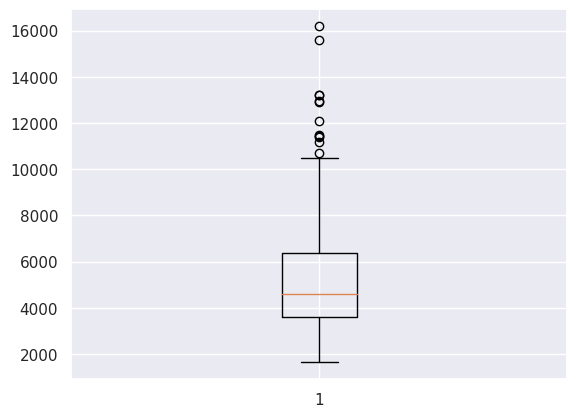

In [11]:
upperlimit=df['area'].mean()+3*df['area'].std()
lowerlimit=df['area'].mean()+3*df['area'].std()
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)
#they consist of the same mean value
#finding outliers
df.loc[(df['area'] > upperlimit) | (df['area'] < lowerlimit)]
plt.boxplot(df.area)

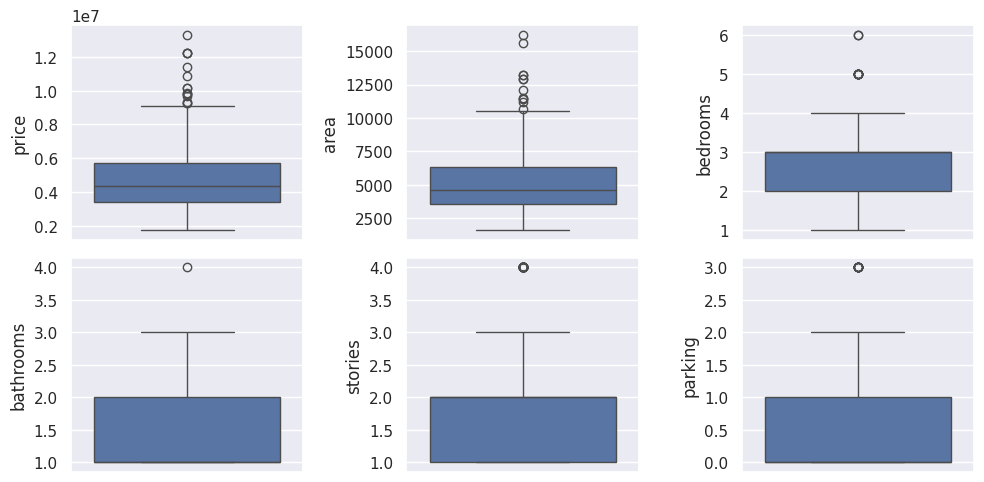

In [12]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

# EXPLORATORY DATA ANALYSIS

<AxesSubplot: >

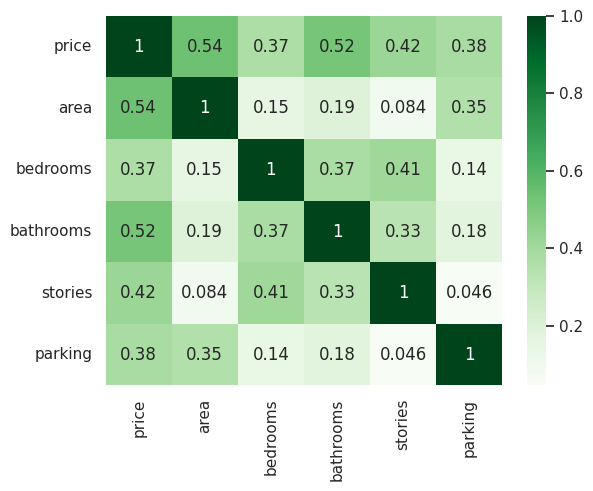

In [13]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='Greens')

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


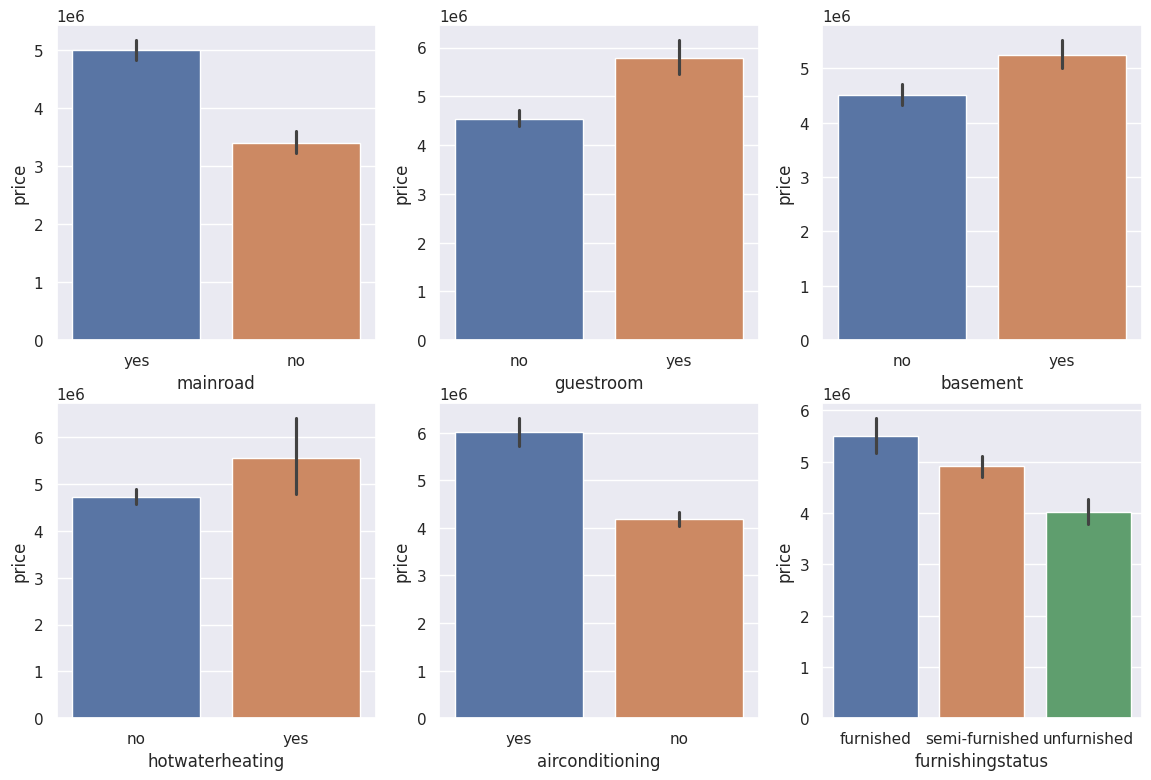

In [15]:
plt.figure(figsize=(14,9))
plt.subplot(2,3,1)
sns.barplot(x='mainroad',y='price',data =df,hue='mainroad')
plt.subplot(2,3,2)
sns.barplot(x = 'guestroom', y = 'price', data = df,hue='guestroom')
plt.subplot(2,3,3)
sns.barplot(x = 'basement', y = 'price', data = df,hue='basement')
plt.subplot(2,3,4)
sns.barplot(x = 'hotwaterheating', y = 'price', data = df,hue='hotwaterheating')
plt.subplot(2,3,5)
sns.barplot(x = 'airconditioning', y = 'price', data = df,hue='airconditioning')
plt.subplot(2,3,6)
sns.barplot(x = 'furnishingstatus', y = 'price', data = df,hue='furnishingstatus')
plt.show()

In [16]:
#segregating the categorical value and numerical values

df.columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes != 'objects'):
        num_col.append(col)
print(num_col)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [17]:
df.columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes =='objects'):
        cat_col.append(col)
print(cat_col)

[]


#DATA PREPERATION

In [18]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [20]:
statusfurnished=pd.get_dummies(df['furnishingstatus'])

In [21]:
statusfurnished.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [22]:
statusfurnished = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [23]:
pd.concat([df,statusfurnished],axis=True)
df.drop(['furnishingstatus'], axis = 1, inplace = True)

#BASELINEMODEL [TESTING AND TRAINING MODEL]

In [24]:
x=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]
y=df['price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0


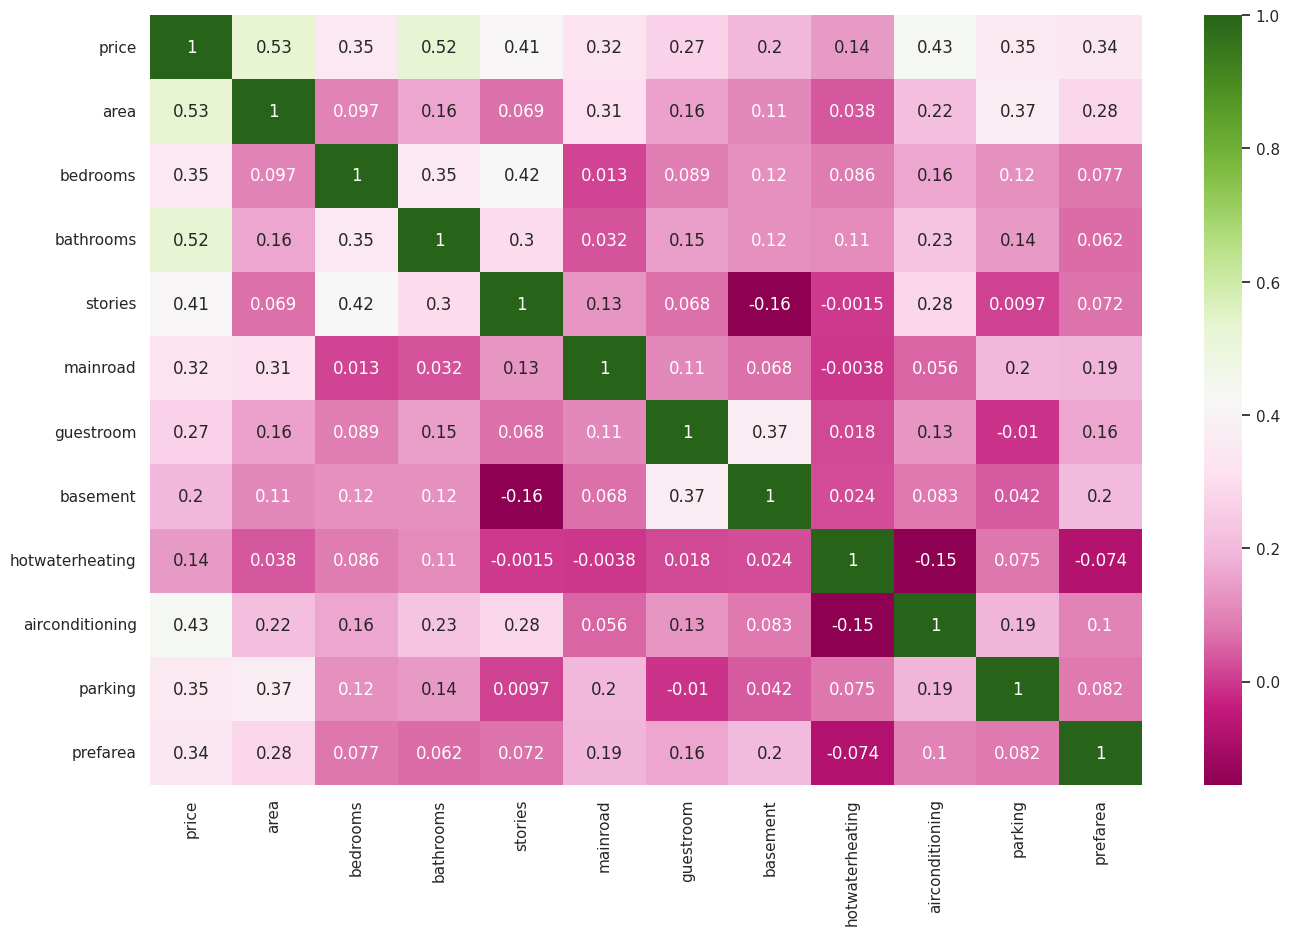

In [30]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="PiYG")
plt.show()

In [31]:
#DIVIDING THE DATASET
y_train = df_train.pop('price')
X_train = df_train

# MODELING THE DATASET

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [33]:
x_reset_index = x.reset_index(drop=True)
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

> coeff_df=pd.DataFrame(lm.coeff_,X.columns,columns=['coeffecient'])

In [34]:
import pandas as pd

# Create coeffecient dataframe
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
area,0.237417
bedrooms,0.053082
bathrooms,0.194447
stories,0.109401
mainroad,0.054240
guestroom,0.028472
basement,0.023391
hotwaterheating,0.088790
airconditioning,0.069305
parking,0.064211


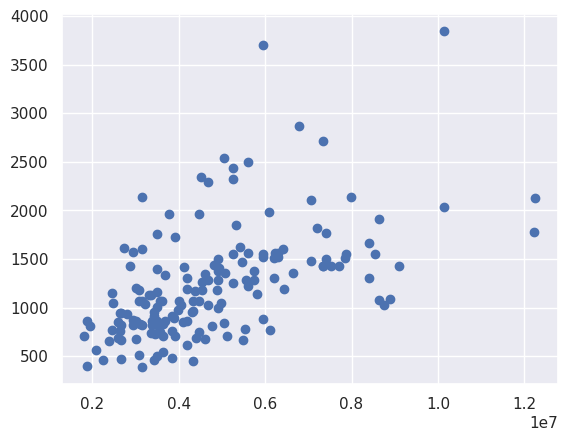

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']], df['price'], test_size=0.3, random_state=100)
prediction=lm.predict(X_test)
plt.scatter(y_test,prediction)

/tmp/ipykernel_75/3246414746.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50)


<AxesSubplot: xlabel='price', ylabel='Density'>

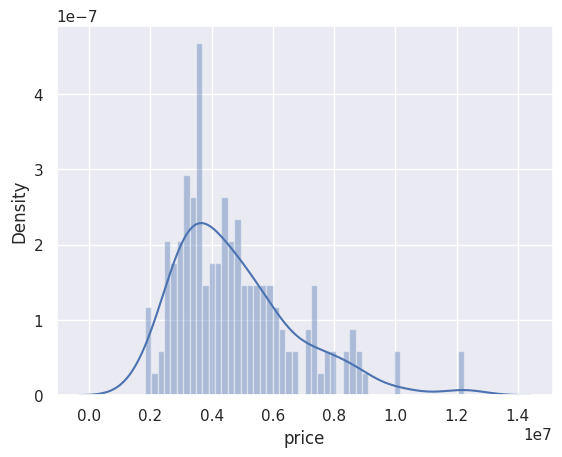

In [40]:
import seaborn as sns
sns.distplot((y_test-prediction),bins=50)

Text(0, 0.5, 'prediction')

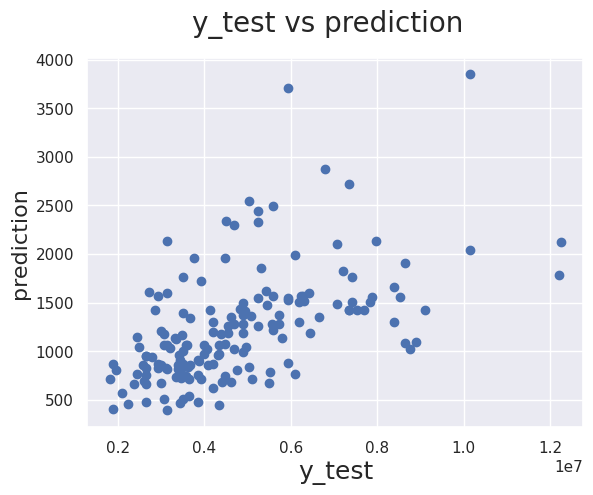

In [44]:
fig = plt.figure()
plt.scatter(y_test,prediction)
fig.suptitle('y_test vs prediction', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('prediction', fontsize=16)   

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465f362d-158c-47df-86be-9ea859bfe1b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>